Уважаемые студенты!

Задачи выполняются с помощью стандартных библиотек питона без установки сторонних библиотек. Все задачи направлены на проверку усвоения пройденного материала. Вспомните как работать с библиотекой Pandas.

Желаем удачи!

**Задача №1**. **Создание и базовый анализ DataFrame:**

- Создайте DataFrame из словаря, где ключи — имена столбцов, а значения — списки данных.
- Выполните базовый анализ данных с помощью методов head(), info(), describe() и shape.


In [2]:
import pandas as pd
data = {
    'Имя': ['Анна', 'Борис', 'Виктор', 'Галина', 'Дмитрий'],
    'Возраст': [23, 30, 35, 29, 40],
    'Город': ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань']
}

df = pd.DataFrame(data)
df.head()


,Имя,Возраст,Город
0,Анна,23,Москва
1,Борис,30,Санкт-Петербург
2,Виктор,35,Новосибирск
3,Галина,29,Екатеринбург
4,Дмитрий,40,Казань


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Имя      5 non-null      object
 1   Возраст  5 non-null      int64 
 2   Город    5 non-null      object
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


In [4]:
df.describe()

,Возраст
count,5.000000
mean,31.400000
std,6.426508
min,23.000000
25%,29.000000
50%,30.000000
75%,35.000000
max,40.000000


In [5]:
df.shape

(5, 3)

**Задача №2**. **Работа с индексами и фильтрация:**

- Отфильтруйте строки, основываясь на значениях в одном или нескольких столбцах.


In [8]:
data = {
    'Имя': ['Анна', 'Борис', 'Виктор', 'Галина', 'Дмитрий'],
    'Возраст': [23, 30, 35, 29, 40],
    'Город': ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань']
}

df = pd.DataFrame(data)
filtered_by_age = df[df['Возраст'] >= 35]
filtered_by_age

,Имя,Возраст,Город
2,Виктор,35,Новосибирск
4,Дмитрий,40,Казань


In [10]:
filtered_by_city = df[df['Город'].isin(['Москва', 'Санкт-Петербург'])]
filtered_by_city

,Имя,Возраст,Город
0,Анна,23,Москва
1,Борис,30,Санкт-Петербург


**Задача №3**. **Обработка отсутствующих данных:**

  - Заполните отсутствующие значения методом fillna(), используя среднее значение по столбцу.
  - Удалите строки с отсутствующими значениями методом dropna().


In [14]:
import numpy as np

data = {
    'Имя': ['Анна', 'Борис', 'Виктор', 'Галина', 'Дмитрий'],
    'Возраст': [23, np.nan, 35, 29, np.nan],
    'Город': ['Москва', 'Санкт-Петербург', 'Новосибирск', None, 'Казань']
}

df = pd.DataFrame(data)
df['Возраст'] = df['Возраст'].fillna(df['Возраст'].mean()).astype(int)
df_without_none = df.dropna()
df_without_none

,Имя,Возраст,Город
0,Анна,23,Москва
1,Борис,29,Санкт-Петербург
2,Виктор,35,Новосибирск
4,Дмитрий,29,Казань


**Задача №4**. **Группировка и агрегирование данных:**
   - Создайте DataFrame из словаря и выполните его группировку по определённым категориям.
   - Используйте методы groupby() и agg() для получения суммарных и средних значений по группе.

In [17]:
data = {
    'Группа': ['A', 'B', 'A', 'B', 'A'],
    'Значение': [10, 20, 15, 25, 40]
}
df = pd.DataFrame(data)
grouped = df.groupby('Группа').agg(
    Сумма=('Значение', 'sum'),
    Среднее=('Значение', 'mean')
)
grouped

,Сумма,Среднее
Группа,,
A,65,21.666667
B,45,22.500000


**Задача №5**. **Объединение и слияние DataFrame:**
   - Создайте два DataFrame из словарей.
   - Примените методы merge() и concat(), чтобы объединить эти DataFrame разными способами.

In [20]:
data1 = {
    'Имя': ['Анна', 'Борис'],
    'Возраст': [23, 30]
}

data2 = {
    'Имя': ['Виктор', 'Галина'],
    'Возраст': [35, 29]
}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df_concat = pd.concat([df1, df2], ignore_index=True)
df_concat 


,Имя,Возраст
0,Анна,23
1,Борис,30
2,Виктор,35
3,Галина,29


для merge посчитала нужным создать еще одну таблицу
data3 = {
    'Имя': ['Анна', 'Борис', 'Галина', 'Виктор'],
    'Город': ['Москва', 'СПб', 'Казань', 'Екатеринбург']
}

In [28]:
data3 = {
    'Имя': ['Анна', 'Борис', 'Галина', 'Виктор'],
    'Город': ['Москва', 'Санкт-Петербург', 'Казань', 'Екатеринбург']
}
df3 = pd.DataFrame(data3)
df_merge = pd.merge(df_concat, df3, on='Имя', how='inner')
df_merge

,Имя,Возраст,Город
0,Анна,23,Москва
1,Борис,30,Санкт-Петербург
2,Виктор,35,Екатеринбург
3,Галина,29,Казань


**Задача №6**. **Применение функций к данным:**
  - Создайте DataFrame из словаря и используйте метод apply() для преобразования данных в колонке "Возраст" (например, умножьте все значения на 2).

In [32]:
data = {
    'Имя': ['Анна', 'Борис', 'Виктор'],
    'Возраст': [23, 30, 35]
}
df = pd.DataFrame(data)
df['Возраст'] = df['Возраст'].apply(lambda x: x**2)
df

,Имя,Возраст
0,Анна,529
1,Борис,900
2,Виктор,1225


**Задача №7**. **Временные ряды и данные по дате и времени:**
  - Создайте DataFrame с временными данными, используя pd.date_range().
  - Выполните операции ресемплирования (resample()) для агрегирования данных на основе временных интервалов.

In [ ]:
import pandas as pd

date_range = pd.date_range(start='2025-01-01', periods=5, freq='D')
data = {
    'Дата': date_range,
    'Значение': [100, 150, 200, 250, 300]
}

df = pd.DataFrame(data)
df.set_index('Дата', inplace=True) 
df_resampled = df.resample('D').sum()
df_resampled

,Значение
Дата,
2025-01-01,100.0
2025-01-02,150.0
2025-01-03,200.0
2025-01-04,250.0
2025-01-05,300.0


**Задача №8**. **Визуализация данных с помощью Pandas**
  - Создайте DataFrame из словаря
  - Постройте диаграмму для вашего DataFrame используя matplotlib.pyplot.

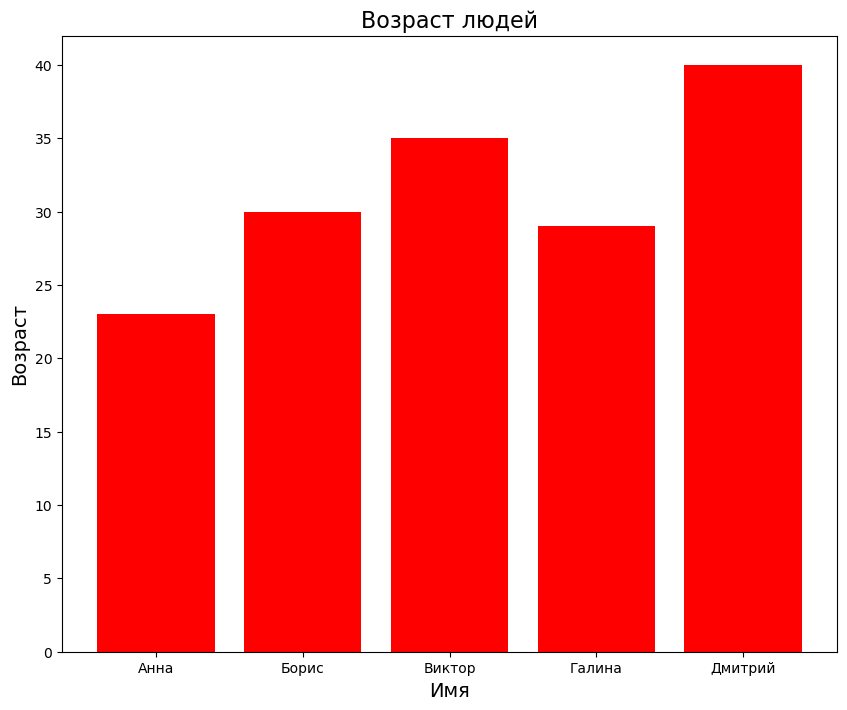

In [49]:
import matplotlib.pyplot as plt

data = {
    'Имя': ['Анна', 'Борис', 'Виктор', 'Галина', 'Дмитрий'],
    'Возраст': [23, 30, 35, 29, 40]
}

df = pd.DataFrame(data)
plt.figure(figsize=(10, 8)) 
plt.bar(df['Имя'], df['Возраст'], color='red')
plt.title('Возраст людей', fontsize=16)
plt.xlabel('Имя', fontsize=14)
plt.ylabel('Возраст', fontsize=14)
plt.show()